In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from utils import do_cv, rejeitar_hip_nula
%matplotlib inline

In [16]:
df = pd.read_csv("./Video_games_esrb_rating.csv")

In [17]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [18]:
for column in df.columns:
    print(column, end='  ')

title  console  alcohol_reference  animated_blood  blood  blood_and_gore  cartoon_violence  crude_humor  drug_reference  fantasy_violence  intense_violence  language  lyrics  mature_humor  mild_blood  mild_cartoon_violence  mild_fantasy_violence  mild_language  mild_lyrics  mild_suggestive_themes  mild_violence  no_descriptors  nudity  partial_nudity  sexual_content  sexual_themes  simulated_gambling  strong_janguage  strong_sexual_content  suggestive_themes  use_of_alcohol  use_of_drugs_and_alcohol  violence  esrb_rating  

# Separando os valores de classes em X (features) e y (target) e removendo coluna title

### Como a coluna title não agrega para a construção do classificador, decidimos retira-lá


In [22]:

#Atributo de saída
y = df['esrb_rating'].values.ravel()

#Atributos de entrada
X = df.drop(['esrb_rating', 'title'], axis=1)

In [23]:
X.shape, y.shape

((1895, 32), (1895,))

## Utilizando PCA para reduzir a dimensionalidade (2)

In [25]:
pca = PCA(n_components=2) #reduzindo a dimensionalidade para 2
X_pca = pca.fit_transform(X)

X_pca.shape



(1895, 2)

In [26]:

X_pca = pd.DataFrame(X_pca, columns=['PC 0', 'PC 1']) # Transformando em DataFrame
X_pca.shape, y.shape # Verificando o shape dos dados  

((1895, 2), (1895,))

## Scatterplot das classificações após a redução de dimensionalidade
#### Percebemos uma dispersão bem grande dos dados, com alguns valores acumulando amostras. 
#### Alguns pontos notado: 
- Para valores de PC1 maiores que 0.4 temos as categoria M e T
- Para valores de PC0 menores que -0.75 temos em abundancia da categoria M
- Para valores de PC0 maiores de 0.75, temos as categorias ET e T

<Axes: xlabel='PC 0', ylabel='PC 1'>

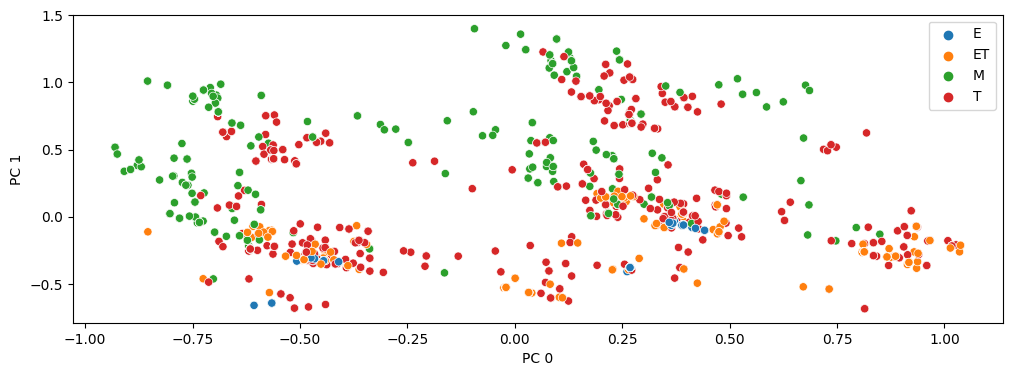

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

sns.scatterplot(x='PC 0', y='PC 1', hue=y, data=X_pca, ax=ax)


## Aplicando o classificador Decision Tree usando validação cruzada em dois níveis